# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [357]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shapely
import fiona
import geopandas as gp
from shapely.geometry import Polygon


Koalas are commonly admitted for treatment and/or rehabilitation for the following reasons:

- chlamydial-related diseases. Chlamydia are bacteria which cause chronic infection including conjunctivitis, cystitis, infertility and kidney failure
- traumatic injuries caused by cars and dogs
- orphaned joeys (baby koalas).

Statistics are collected from all koalas and are entered onto a specifically designed koala database which now contains over 50,000 records. This information is used by the department to produce maps and reports which guide koala management decisions.

In [358]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)


In [359]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to
colors = plt.cm.Spectral(np.linspace(0, 1, 25))
h = 'helvetica'
plt.style.use('seaborn-whitegrid')

In [360]:

fp = 'maps/QLD_LOCALITY_POLYGON_shp.shp'
QLD = gp.GeoDataFrame.from_file(fp)
QLD.drop(["QLD_LOCA_1", "QLD_LOCA_3", "QLD_LOCA_4", "QLD_LOCA_6", "DT_RETIRE", "QLD_LOCA_7", "QLD_LOCA_5"], axis=1, inplace=True)

QLD.head()

,LC_PLY_PID,DT_CREATE,LOC_PID,QLD_LOCALI,QLD_LOCA_2,geometry
0,67839,2018-09-13,QLD1991,2016-08-10,MOUNT BERRYMAN,"POLYGON ((152.30132 -27.75523, 152.30122 -27.7..."
1,64808,2017-06-14,QLD2092,2017-08-10,MOUNTAIN CREEK,"POLYGON ((153.10559 -26.71514, 153.10323 -26.7..."
2,64939,2017-06-14,QLD1803,2017-08-10,MARCOOLA,"POLYGON ((153.09112 -26.61160, 153.09065 -26.6..."
3,67905,2018-09-13,QLD744,2018-05-09,COVERTY,"POLYGON ((151.44572 -26.33205, 151.44550 -26.3..."
4,63067,2016-06-29,QLD3331,2018-08-07,BOUNTIFUL ISLANDS,"POLYGON ((139.84126 -16.70989, 139.84113 -16.7..."


In [361]:
if os.path.isfile("koalabase.csv"):
    filepath = "koalabase.csv"
    print("loading from file")

koala_data = pd.read_csv(filepath)
print("done")

loading from file
done


/Users/joelnorman/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,18,19,20,21,22,23,24,25,26,27,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [362]:
date = koala_data["Call Date "].str.split("/", expand = True)
koala_data["Year"]= date[2]
koala_data["Month"]= date[1]
koala_data.drop(["Animal Record No. ", "Release LNG", "Release LAT", "Wasted"], axis=1, inplace=True)
koala_data['Month'] = koala_data['Month'].replace({'01':'Jan', '02':'Feb','03':'Mar', '04':'Apr','05':'May', '06':'Jun','07':'Jul', '08':'Aug','09':'Sep', '10':'Oct','11':'Nov', '12':'Dec'})

koala_data.head()



,Call Date,Animal Name,LATITUDE,LONGITUDE,Adult Fate Other,Adult Size,Adult Gender,Adult Situation,Adult Situation Other,Young Present,...,Vehicle Hit,Road Speed Limit (Km),Fall,Injury Other,Status Other,Release Date,Release Suburb,Release Post Code,Year,Month
0,4/07/1996,SIGHTING,-27.182496,153.016159,NaN,Adult (More than 4kg),Unknown,In tree,NaN,False,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,1996,Jul
1,5/07/1996,SIGHTING,-27.638595,153.156763,NaN,Unknown (not recorded),Unknown,In tree,NaN,False,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,1996,Jul
2,1/01/1997,SIGHTING,NaN,NaN,NaN,Adult (More than 4kg),Unknown,In tree,NaN,False,...,False,NaN,False,NaN,NaN,NaN,NaN,NaN,1997,Jan
3,1/01/1997,PHILLY,-27.544270,153.224509,NaN,Sub-Adult (2-4kg),Male,In tree,NaN,False,...,False,NaN,False,NaN,NaN,9/01/1997,Alexandra Hills,4161.0,1997,Jan
4,1/01/1997,CARRIE,-27.516611,153.223217,NaN,Sub-Adult (2-4kg),Female,In tree,NaN,False,...,False,NaN,False,NaN,NaN,13/01/1997,Alexandra Hills,4161.0,1997,Jan


In [398]:
# Create a custom polygon
polygon = Polygon([(148, -29), (148, -20), (154, -20), (154, -29), (148, -29)])
poly_gdf = gp.GeoDataFrame([1], geometry=[polygon], crs=QLD.crs)

QLD_clipped = gp.clip(QLD, polygon)

# # Plot the clipped data
# # The plot below shows the results of the clip function applied to the world
# fig, ax = plt.subplots(figsize=(12, 8))
# QLD_clipped.plot(ax=ax)
# # QLD.boundary.plot(ax=ax) (shows the rest of QLD)
# # poly_gdf.boundary.plot(ax=ax, color="red")
# ax.set_title("QLD Clipped", fontsize=20)
# ax.set_axis_off()



Text(548.5159167596867, 0.5, 'Longitude')

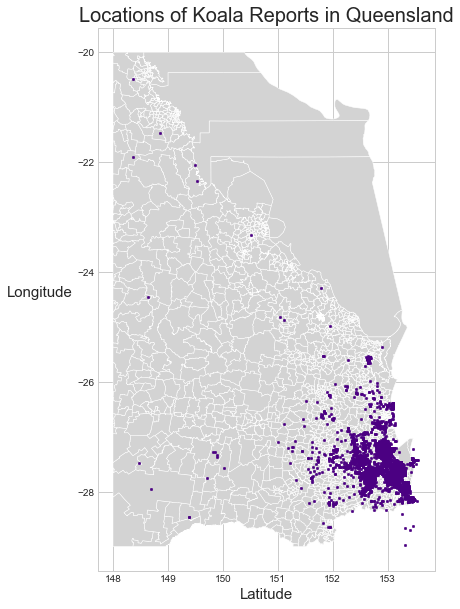

In [399]:
gdf = gp.GeoDataFrame(koala_data, geometry=gp.points_from_xy(koala_data.LONGITUDE, koala_data.LATITUDE))
poly_gdf = gp.GeoDataFrame([1], geometry=[polygon], crs=gdf.crs)
gdf_clipped = gp.clip(gdf, polygon)

fig, ax = plt.subplots()
ax.set_aspect('equal')

QLD_clipped.plot(ax=ax, color = 'lightgrey',edgecolor='white')
gdf_clipped.plot(ax=ax, color= 'indigo', marker=".", markersize=25)
ax.set_title("Locations of Koala Reports in Queensland", fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Longitude', rotation='horizontal',ha='right', fontsize=15)

In [365]:
koala_data.columns

Index(['Call Date ', 'Animal Name', 'LATITUDE', 'LONGITUDE',
       'Adult Fate Other', 'Adult Size', 'Adult Gender', 'Adult Situation',
       'Adult Situation Other', 'Young Present', 'Adult Fate',
       'Young Fate Other', 'Young Fate', 'Koala Suburb', 'Koala Post Code',
       'Koala LGA', 'Sick', 'Injured', 'Caused By Dog', 'Orphaned',
       'Under Threat', 'Dead', 'Conjunctivitis', 'Cystitis', 'Sick Other',
       'Vehicle Hit', 'Road Speed Limit (Km)', 'Fall', 'Injury Other',
       'Status Other', 'Release Date', 'Release Suburb', 'Release Post Code',
       'Year', 'Month', 'geometry'],
      dtype='object')

In [366]:
row_one = koala_data.iloc[1]
row_one

Call Date                                      5/07/1996
Animal Name                                     SIGHTING
LATITUDE                                        -27.6386
LONGITUDE                                        153.157
Adult Fate Other                                     NaN
Adult Size                        Unknown (not recorded)
Adult Gender                                     Unknown
Adult Situation                                  In tree
Adult Situation Other                                NaN
Young Present                                      False
Adult Fate                                         Other
Young Fate Other                                     NaN
Young Fate                                         Other
Koala Suburb                                  Daisy Hill
Koala Post Code                                     4127
Koala LGA                             Logan City Council
Sick                                               False
Injured                        

1996       2
2017      39
2015     136
2014     430
2013     520
2016     942
2012    1020
1997    1862
1998    1890
1999    1944
2011    2055
2006    2207
2007    2236
2003    2294
2001    2350
2008    2487
2005    2500
2002    2517
2004    2719
2000    2939
2010    3320
2009    3496
Name: Year, dtype: int64


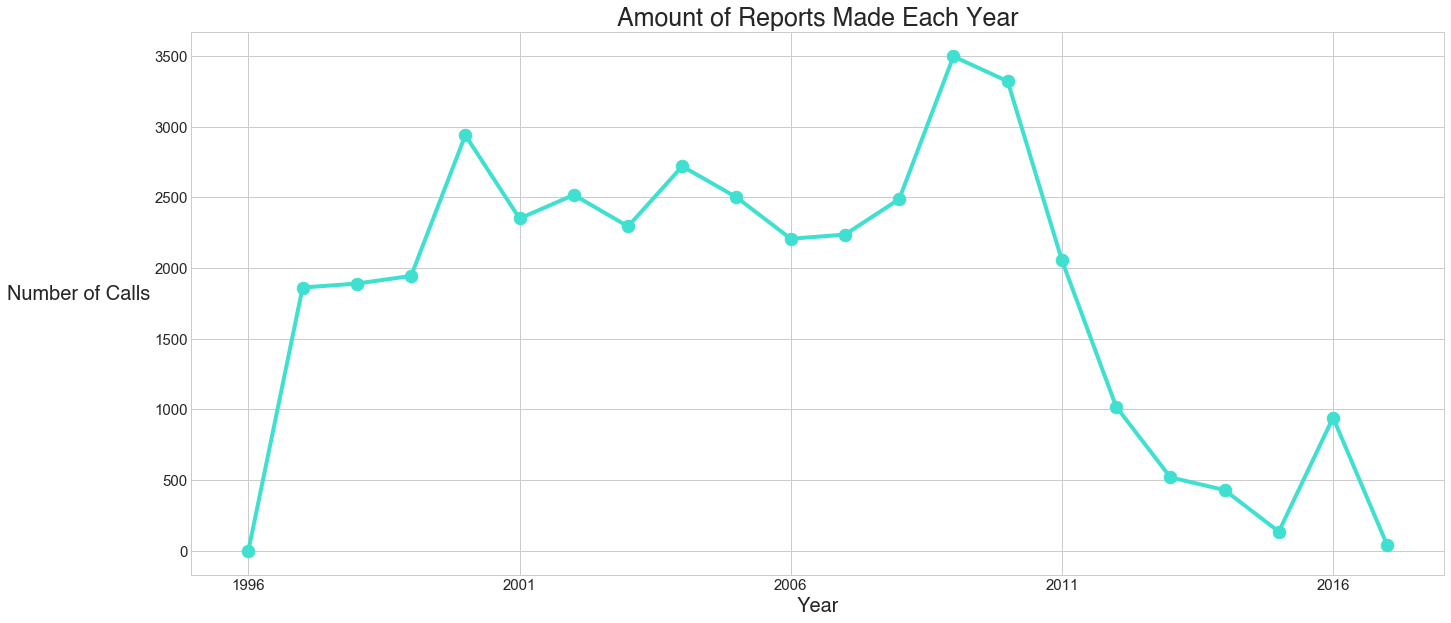

In [404]:
print((koala_data['Year'].value_counts(ascending=True)))
year_values=koala_data.groupby(['Year'])['Year'].count().plot(kind='line', linewidth=4, markersize=25, style='.-', fontsize=15, markevery=1, color = 'turquoise', rot=0)
plt.title("Amount of Reports Made Each Year", fontsize=25, family= h)
plt.xlabel('Year', fontsize=20, family= h)
plt.ylabel('Number of Calls', fontsize=20, family= h, rotation='horizontal',ha='right')
plt.style.use('seaborn-whitegrid')
plt.show()
# axis = koala_data.loc[range(1996,2017)]


Male       15396
Female     14479
Unknown     9048
Name: Adult Gender, dtype: int64


Text(0.5, 1.0, 'Koala Gender')

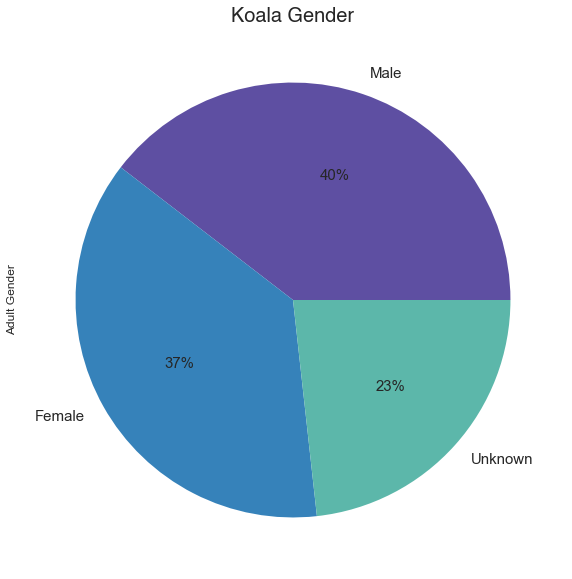

In [407]:
print(koala_data["Adult Gender"].value_counts())
color = plt.cm.Spectral_r(np.linspace(0, 1, 12))
koala_data["Adult Gender"].value_counts().plot(kind="pie", fontsize=15, autopct='%1.0f%%', colors=color)
plt.title("Koala Gender", fontsize=20, family= h)


Text(0, 0.5, 'Reports')

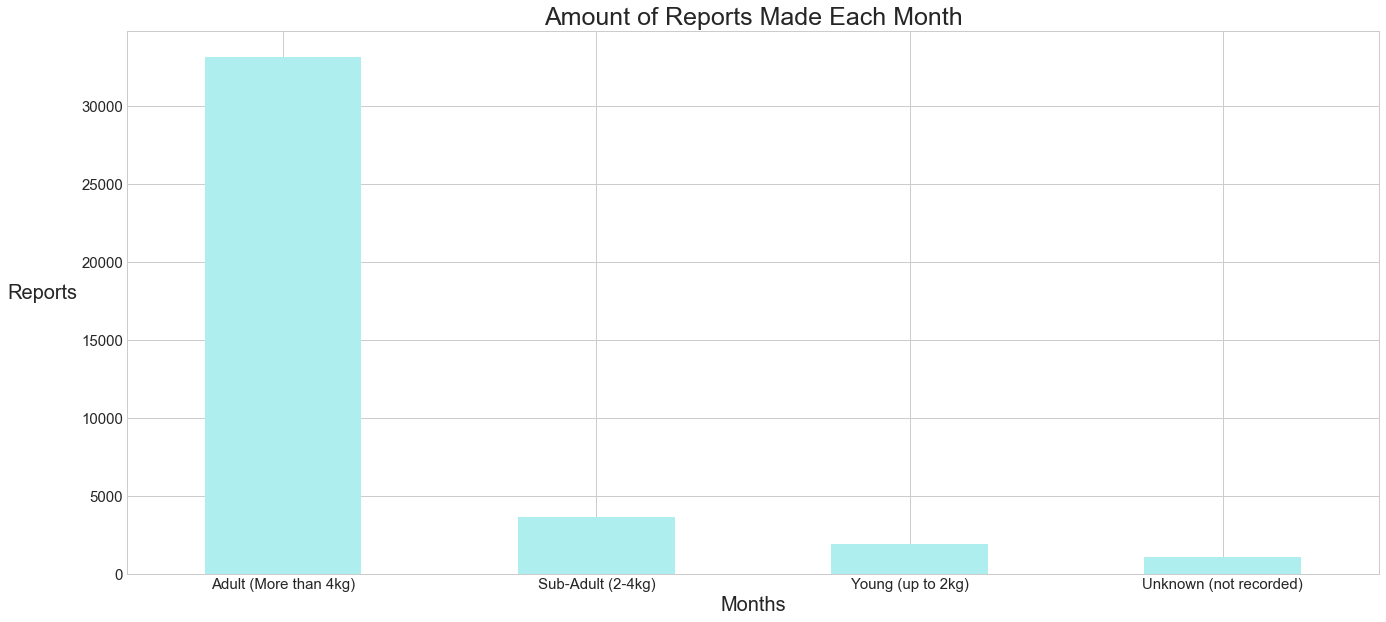

In [369]:
koala_data["Adult Size"].value_counts().plot.bar(color='paleturquoise', rot=0,fontsize=15)
plt.title("Amount of Reports Made Each Month", fontsize=25)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Reports', fontsize=20, rotation='horizontal', ha='right')


Joyner               514
Kurwongbah           527
Redland Bay          534
Mount Forbes         559
Strathpine           620
Springwood           625
Narangba             629
Morayfield           648
Victoria Point       655
Burpengary           667
Sheldon              739
Wellington Point     774
Birkdale             897
Bray Park            916
Lawnton             1018
Thornlands          1052
Ormiston            1106
Alexandra Hills     1205
Cleveland           1522
Kallangur           1584
Petrie              2012
Capalaba            2334
Name: Koala Suburb, dtype: int64


Text(0, 0.5, 'Reports')

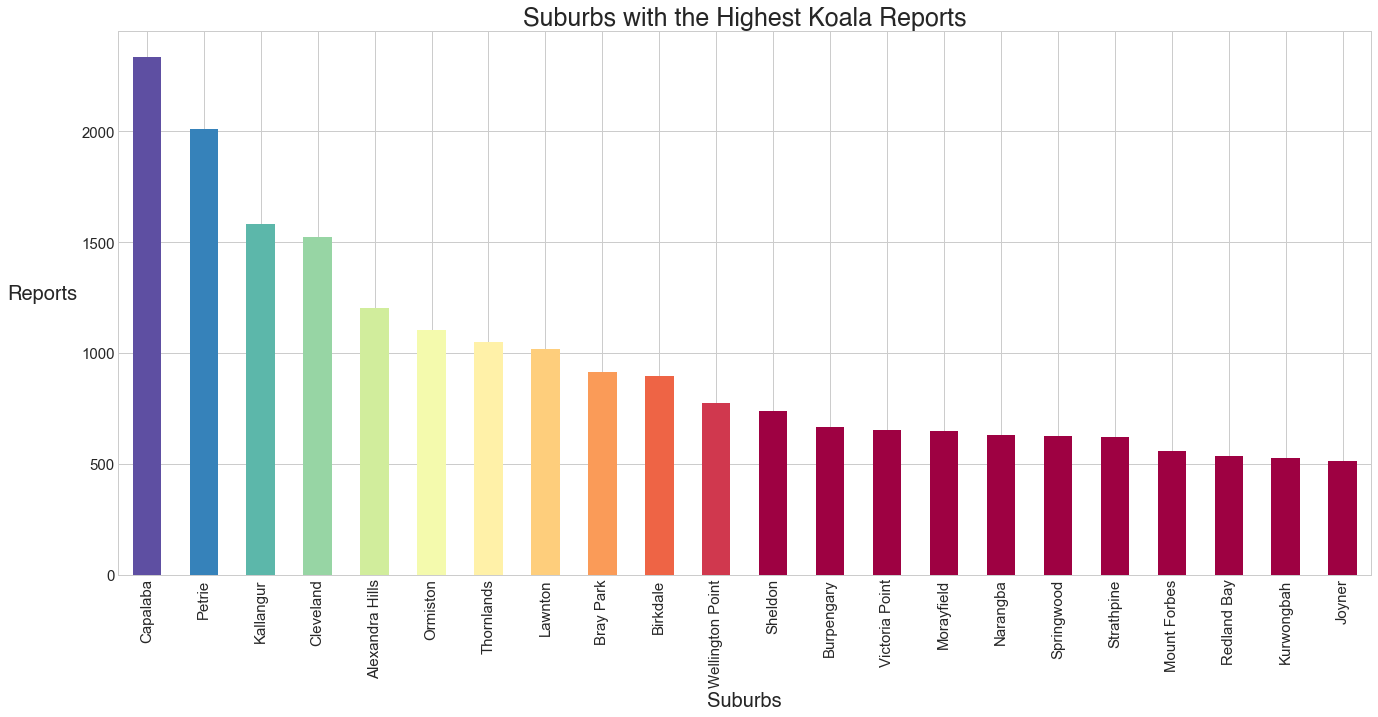

In [370]:
print(koala_data['Koala Suburb'].value_counts(ascending=True).loc[lambda x : x>500])
c = plt.cm.Spectral_r(np.linspace(0, 2, 23))

koala_data["Koala Suburb"].value_counts(ascending=False).loc[lambda x : x>500].plot(kind="bar", fontsize=15, color=c)
plt.title("Suburbs with the Highest Koala Reports", fontsize=25, family= h)
plt.xlabel('Suburbs', fontsize=20, family= h)
plt.ylabel('Reports', fontsize=20, rotation='horizontal', ha='right', family= h)


In [371]:
suburbs= QLD.loc[QLD['QLD_LOCA_2'].isin(['CAPALABA','PETRIE', 'JOYNER', 'KURWONGBAH', 'REDLAND BAY', 'MOUNT FORBES', 'STRATHPINE', 'SPRINGWOOD', 'NARANGBA', 'MORAYFIELD', 'VICTORIA POINT', 'BURPENGARY', 'SHELDON', 'WELLINGTON POINT', 'BIRKDALE', 'BRAY PARK', 'LAWNTON', 'THORNLANDS', 'ORMISTON', 'ALEXANDRA HILLS', 'CLEVELAND', 'KALLANGUR'])]
reports = [1018, 2012, 1584, 667, 916, 514, 1205, 620, 625, 629, 774, 2334, 1522, 1052, 534, 655, 897, 1106, 527, 739, 648, 559]
suburbs.insert(5, "Num_Reports", reports, True)
suburbs = suburbs.sort_values(by ='Num_Reports', ascending= False)
suburbs

,LC_PLY_PID,DT_CREATE,LOC_PID,QLD_LOCALI,QLD_LOCA_2,Num_Reports,geometry
2237,70000,2019-12-05,QLD530,2017-11-09,CAPALABA,2334,"POLYGON ((153.21498 -27.56850, 153.21321 -27.5..."
847,70284,2019-12-05,QLD2361,2018-02-05,PETRIE,2012,"POLYGON ((152.99122 -27.27840, 152.99044 -27.2..."
848,70255,2019-12-05,QLD1506,2018-05-09,KALLANGUR,1584,"POLYGON ((152.99785 -27.27075, 152.99632 -27.2..."
2238,70015,2019-12-05,QLD632,2018-02-05,CLEVELAND,1522,"POLYGON ((153.28494 -27.54972, 153.27912 -27.5..."
1118,66232,2017-12-12,QLD31,2018-02-05,ALEXANDRA HILLS,1205,"POLYGON ((153.23597 -27.56564, 153.23576 -27.5..."
2385,65778,2017-09-12,QLD2289,2017-11-09,ORMISTON,1106,"POLYGON ((153.26057 -27.52434, 153.26028 -27.5..."
2239,70363,2019-12-05,QLD2890,2017-11-09,THORNLANDS,1052,"POLYGON ((153.22875 -27.58999, 153.22875 -27.5..."
28,67865,2018-09-13,QLD1682,2017-11-09,LAWNTON,1018,"POLYGON ((152.98550 -27.29748, 152.98548 -27.2..."
1002,60029,2016-06-29,QLD368,2016-08-10,BRAY PARK,916,"POLYGON ((152.96487 -27.30461, 152.96461 -27.3..."
2269,65271,2017-09-12,QLD266,2017-11-09,BIRKDALE,897,"POLYGON ((153.22777 -27.51541, 153.22771 -27.5..."


Text(523.532064613276, 0.5, 'Longitude')

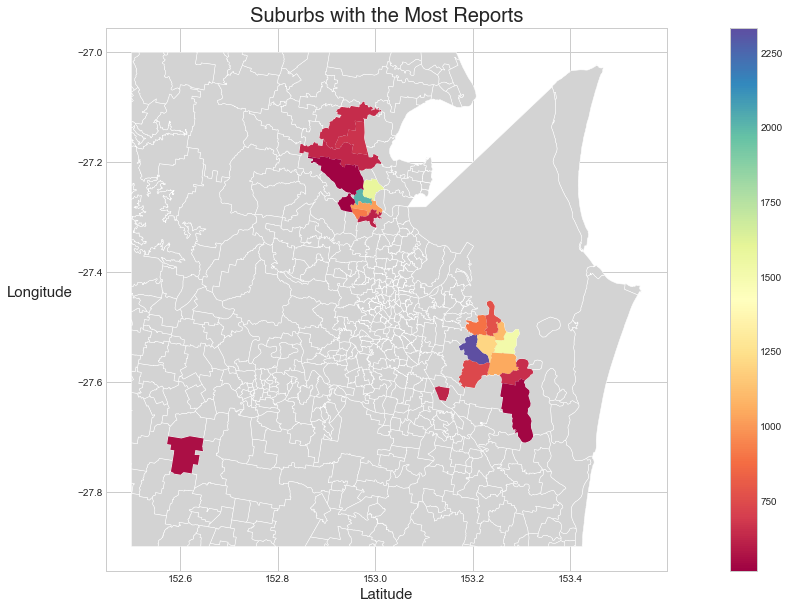

In [396]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

polygon = Polygon([(152.5, -27.9), (152.5, -27), (154, -27), (154, -27.9), (152.5, -27.9)])
poly_gdf = gp.GeoDataFrame([1], geometry=[polygon], crs=QLD.crs)

QLD_clipped = gp.clip(QLD, polygon)
QLD_clipped.plot(ax=ax, color = 'lightgrey',edgecolor='white')
suburbs.plot(ax=ax, column='Num_Reports', cmap='Spectral', legend=True)
ax.set_title("Suburbs with the Most Reports", fontsize=20, family= h)
plt.xlabel('Latitude', fontsize=15, family= h)
plt.ylabel('Longitude', fontsize=15,rotation='horizontal',ha='right', family= h)


In [373]:
monthcounts = koala_data["Month"].value_counts().reset_index().rename(columns = {'Month':'Count','index':'Month'})
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mapping = {month: i for i, month in enumerate(months)}
key = monthcounts['Month'].map(mapping)
monthcounts = monthcounts.iloc[key.argsort()]
monthcounts.index = [0,1,2,3,4,5,6,7,8,9,10,11] 
monthcounts


,Month,Count
0,Jan,2712
1,Feb,2199
2,Mar,2097
3,Apr,2093
4,May,2456
5,Jun,2631
6,Jul,3690
7,Aug,4961
8,Sep,5306
9,Oct,5125


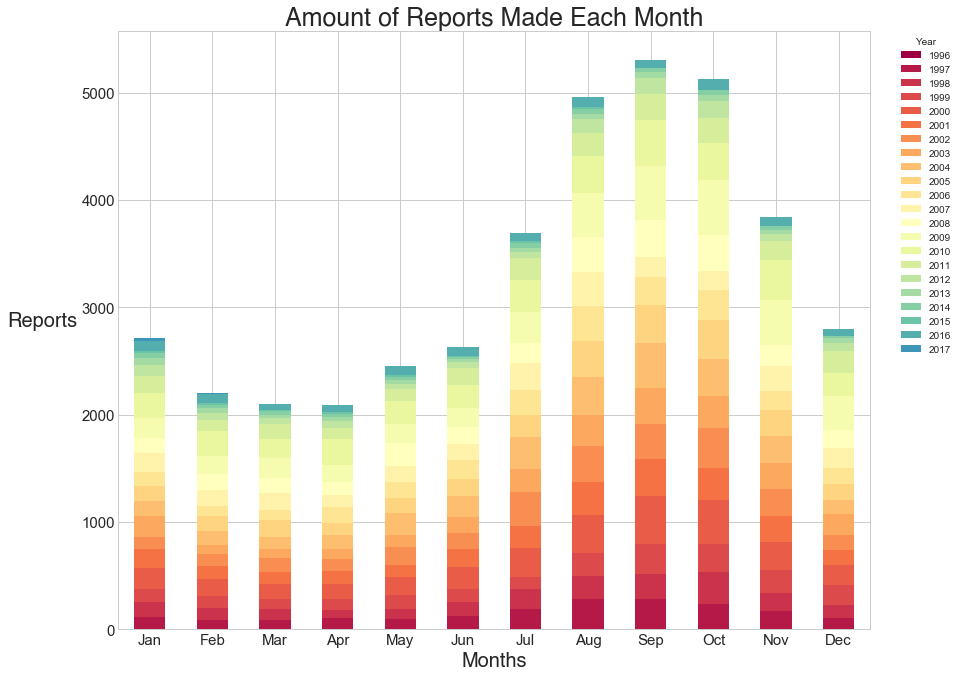

In [374]:
df= koala_data[['Year','Month']].dropna()

df['Counter'] =1 
Count = df.groupby(['Year','Month']).sum()#sum function

Count.reset_index(level=['Month','Year'])
data= Count.reset_index(level=['Month','Year'])

pivot_df = data.pivot(index='Month', columns='Year', values='Counter')
new_index = ['Jan','Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_yr = pivot_df.reindex(new_index)

colors = plt.cm.Spectral(np.linspace(0, 1, 25))

#Note: .loc[:,[1996','1997', '1998']] is used here to rearrange the layer ordering
month_yr.loc[:,['1996','1997', '1998','1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].plot.bar(stacked=True,color=colors, figsize=(12,11), rot=0,fontsize=15)
plt.title("Amount of Reports Made Each Month", fontsize=25, family= h)
plt.xlabel('Months', fontsize=20, family= h)
plt.ylabel('Reports', fontsize=20, rotation='horizontal', ha='right', family= h)
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1.005),title="Year",fontsize='medium', fancybox=True)


In tree         16669
On ground       11564
In captivity     3574
Other            2094
Name: Adult Situation, dtype: int64


Text(0, 0.5, 'Number of Koalas')

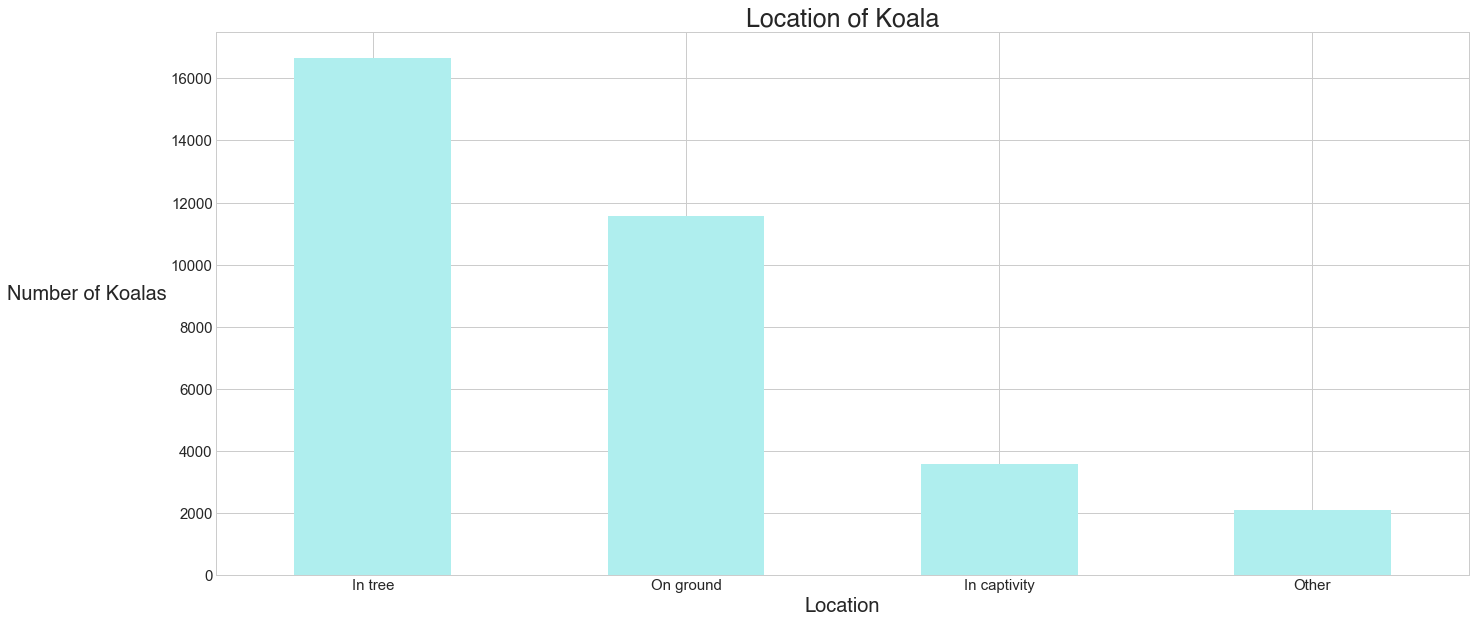

In [375]:
print(koala_data["Adult Situation"].value_counts())
koala_data["Adult Situation"].value_counts().plot(kind="bar", fontsize=15, rot=0, color='paleturquoise')
plt.title("Location of Koala", fontsize=25, family= h)
plt.xlabel('Location', fontsize=20, family= h)
plt.ylabel('Number of Koalas', rotation='horizontal', ha='right', fontsize=20, family= h)




Doing the same thing on a dataframe gives us the whole column

,Koala Name,Count
0,HARRY,21
1,GEORGE,19
2,CHARLIE,19
3,KENNY,18
5,BRUCE,18
6,LUCY,17
7,FRED,17
8,ANDY,17
9,SAM,17
10,MAGGIE,16


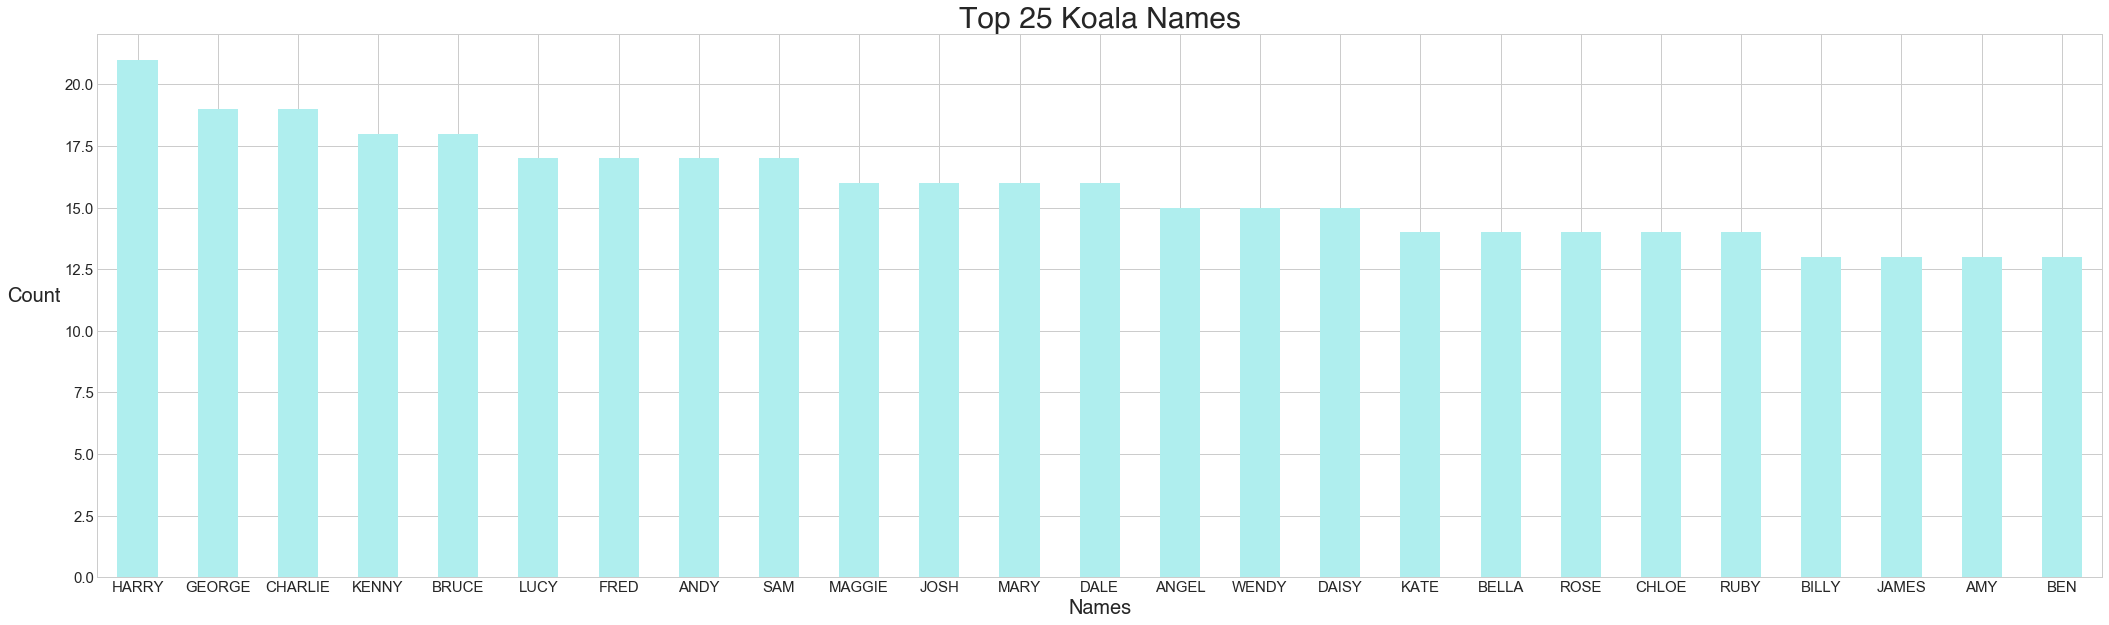

In [387]:
name = koala_data["Animal Name"].value_counts()
top25= name[26:54]
Name = pd.DataFrame({'Koala Name':top25.index, 'Count':top25.values})
Top25_new= Name.drop([Name.index[4], Name.index[13], Name.index[24]])

Top25_new.plot.bar(x= 'Koala Name', y= 'Count', color='paleturquoise', figsize=(32,10), rot=0,fontsize=15, legend = None)
plt.title("Top 25 Koala Names", fontsize=30, family= h)
plt.xlabel('Names', fontsize=20, family= h)
plt.ylabel('Count', fontsize=20, rotation='horizontal', ha='right', family= h)

Top25_new



,Count
Report Type,
Vehicle Hit,7514
Cystitis,7496
Dead,5936
Conjunctivitis,5611
Caused By Dog,2559
Orphaned,34
Fall,30


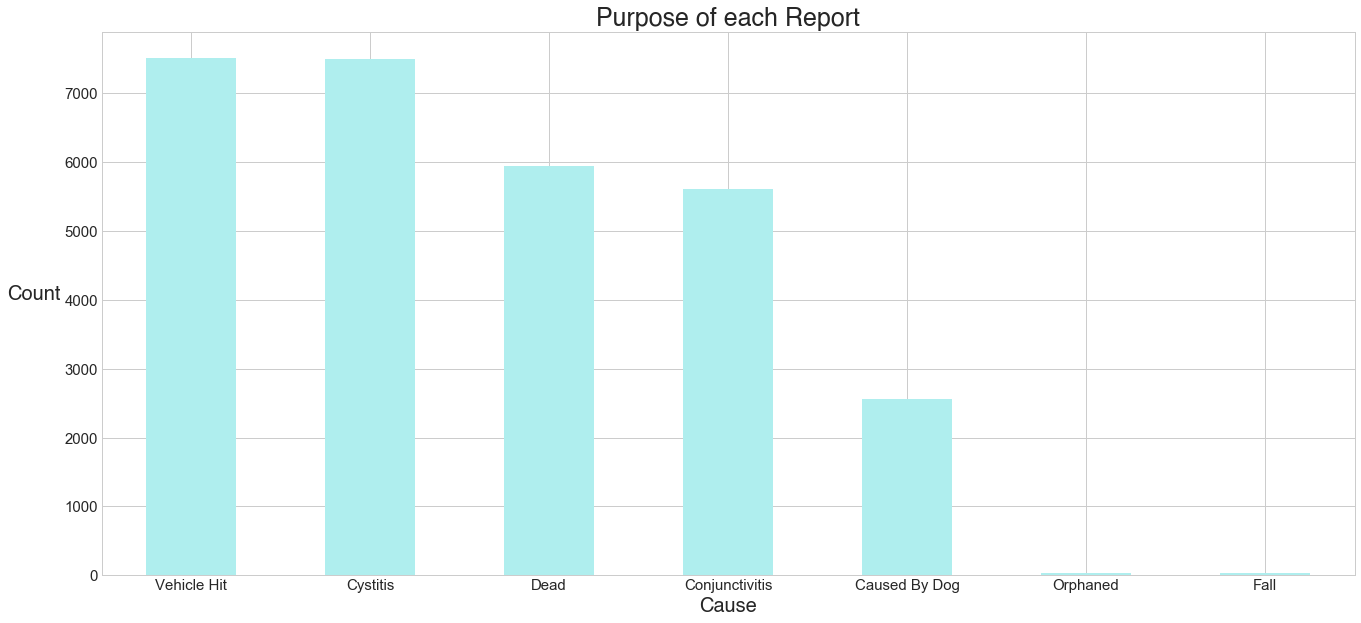

In [377]:
new_df = koala_data[['Vehicle Hit','Cystitis','Dead', 'Conjunctivitis','Caused By Dog','Orphaned', 'Fall']]
true_data = new_df.apply(pd.Series.value_counts)
true_data = true_data.drop(true_data.index[0])
true_data_T= true_data.T
true_data_T.index.name = 'Report Type'
true_data_T = true_data_T.rename(columns={True:'Count'})

true_data_T.plot.bar(color='paleturquoise', rot=0,fontsize=15, legend = None)
plt.title("Purpose of each Report", fontsize=25, family= h)
plt.xlabel('Cause', fontsize=20, family= h)
plt.ylabel('Count', fontsize=20, rotation='horizontal', ha='right', family= h)
true_data_T


In [378]:
new_df2 = koala_data[['Koala Suburb','Vehicle Hit','Cystitis','Dead', 'Conjunctivitis','Caused By Dog','Orphaned', 'Fall']]
most = new_df2.dropna()


Vehicle = most[['Koala Suburb', 'Vehicle Hit']]
Vehicle = Vehicle[(Vehicle["Vehicle Hit"] == True)]
Vehicle = Vehicle.groupby(['Vehicle Hit','Koala Suburb']).size().reset_index().groupby('Koala Suburb')[[0]].max()
Vehicle = Vehicle.rename(columns={0:'Vehicle'})
Vehicle = Vehicle.sort_values(by ='Vehicle' , ascending=False)
Vehicle= Vehicle[0:5]



In [379]:
Cystitis = most[['Koala Suburb', 'Cystitis']]
Cystitis = Cystitis[(Cystitis["Cystitis"] == True)]
Cystitis = Cystitis.groupby(['Cystitis','Koala Suburb']).size().reset_index().groupby('Koala Suburb')[[0]].max()
Cystitis = Cystitis.rename(columns={0:'Cystitis'})
Cystitis = Cystitis.sort_values(by ='Cystitis' , ascending=False)
Cystitis = Cystitis[0:5]

In [380]:
Dead = most[['Koala Suburb', 'Dead']]
Dead = Dead[(Dead["Dead"] == True)]
Dead = Dead.groupby(['Dead','Koala Suburb']).size().reset_index().groupby('Koala Suburb')[[0]].max()
Dead = Dead.rename(columns={0:'Dead'})
Dead = Dead.sort_values(by ='Dead' , ascending=False)
Dead = Dead[0:5]


In [381]:
Conjunctivitis = most[['Koala Suburb', 'Conjunctivitis']]
Conjunctivitis = Conjunctivitis[(Conjunctivitis["Conjunctivitis"] == True)]
Conjunctivitis = Conjunctivitis.groupby(['Conjunctivitis','Koala Suburb']).size().reset_index().groupby('Koala Suburb')[[0]].max()
Conjunctivitis = Conjunctivitis.rename(columns={0:'Conjuctivitis'})
Conjunctivitis = Conjunctivitis.sort_values(by ='Conjuctivitis' , ascending=False)
Conjunctivitis = Conjunctivitis[0:5]


In [382]:
Dog = most[['Koala Suburb', 'Caused By Dog']]
Dog = Dog[(Dog["Caused By Dog"] == True)]
Dog = Dog.groupby(['Caused By Dog','Koala Suburb']).size().reset_index().groupby('Koala Suburb')[[0]].max()
Dog = Dog.rename(columns={0:'Dog'})
Dog = Dog.sort_values(by ='Dog' , ascending=False)
Dog = Dog[0:5]


In [383]:
Orphaned = most[['Koala Suburb', 'Orphaned']]
Orphaned = Orphaned[(Orphaned["Orphaned"] == True)]
Orphaned = Orphaned.groupby(['Orphaned','Koala Suburb']).size().reset_index().groupby('Koala Suburb')[[0]].max()
Orphaned = Orphaned.rename(columns={0:'Orphaned'})
Orphaned = Orphaned.sort_values(by ='Orphaned' , ascending=False)
Orphaned = Orphaned[0:5]

In [384]:
Fall = most[['Koala Suburb', 'Fall']]
Fall = Fall[(Fall["Fall"] == True)]
Fall = Fall.groupby(['Fall','Koala Suburb']).size().reset_index().groupby('Koala Suburb')[[0]].max()
Fall = Fall.rename(columns={0:'Fall'})
Fall = Fall.sort_values(by ='Fall' , ascending=False)
Fall = Fall[0:5]


,Vehicle,Cystitis,Dead,Conjuctivitis,Dog,Orphaned,Fall
Capalaba,460.0,648.0,407.0,474.0,138.0,NaN,NaN
Thornlands,326.0,NaN,236.0,247.0,NaN,NaN,NaN
Petrie,290.0,NaN,209.0,NaN,155.0,2.0,2.0
Kallangur,275.0,NaN,171.0,NaN,125.0,2.0,NaN
Cleveland,253.0,331.0,NaN,276.0,NaN,NaN,NaN
Ormiston,NaN,303.0,NaN,244.0,NaN,NaN,NaN
Alexandra Hills,NaN,286.0,187.0,236.0,87.0,NaN,NaN
Sheldon,NaN,278.0,NaN,NaN,NaN,NaN,NaN
Lawnton,NaN,NaN,NaN,NaN,92.0,NaN,NaN
Kurwongbah,NaN,NaN,NaN,NaN,NaN,3.0,NaN


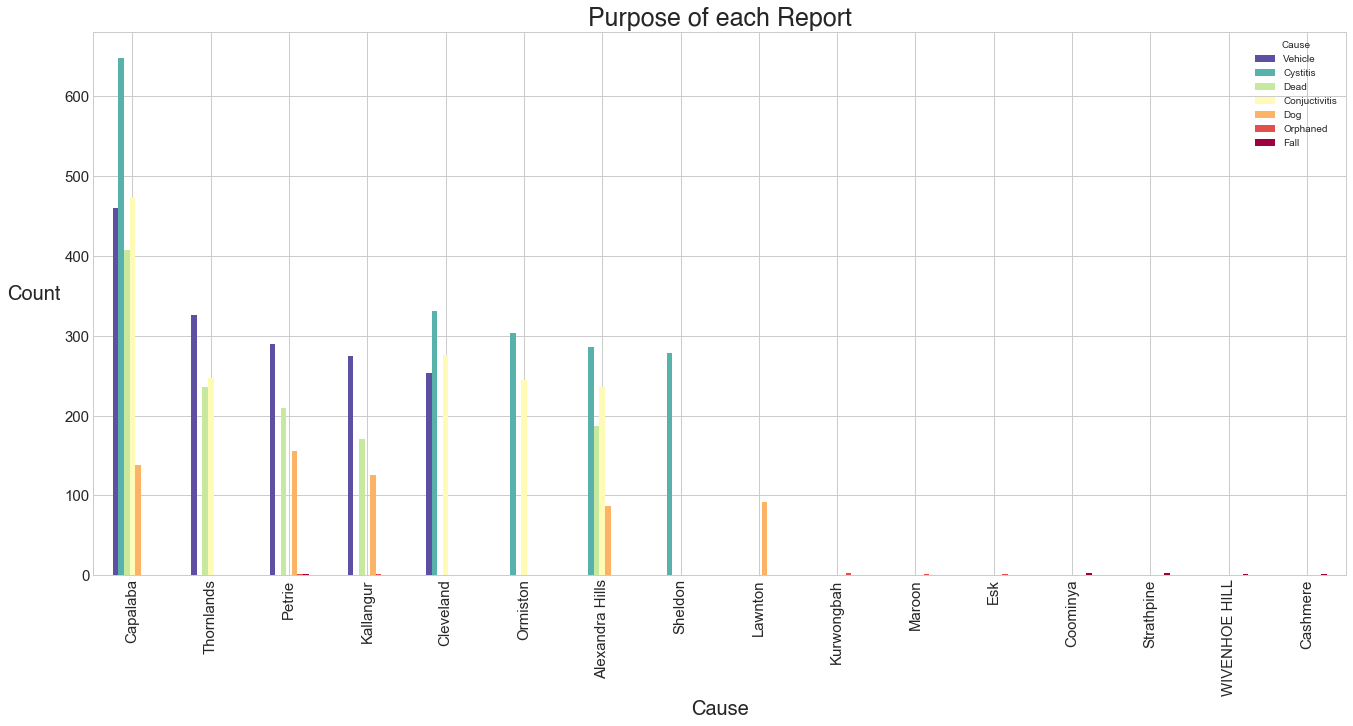

In [385]:
Cause = [Vehicle, Cystitis, Dead, Conjunctivitis , Dog, Orphaned, Fall]
Cause = pd.concat(Cause, axis=1)
r = plt.cm.Spectral_r(np.linspace(0, 5, 30))
Cause.plot.bar(fontsize=15, legend = True, color=r, figsize=(20,10))
plt.title("Purpose of each Report", fontsize=25, family= h)
plt.xlabel('Cause', fontsize=20, family= h)
plt.ylabel('Count', fontsize=20, rotation='horizontal', ha='right', family= h)
plt.legend(loc='upper right',title="Cause",fontsize='medium', fancybox=True)
Cause
